# importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from pickle import dump
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Exploratory Data Analysis

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

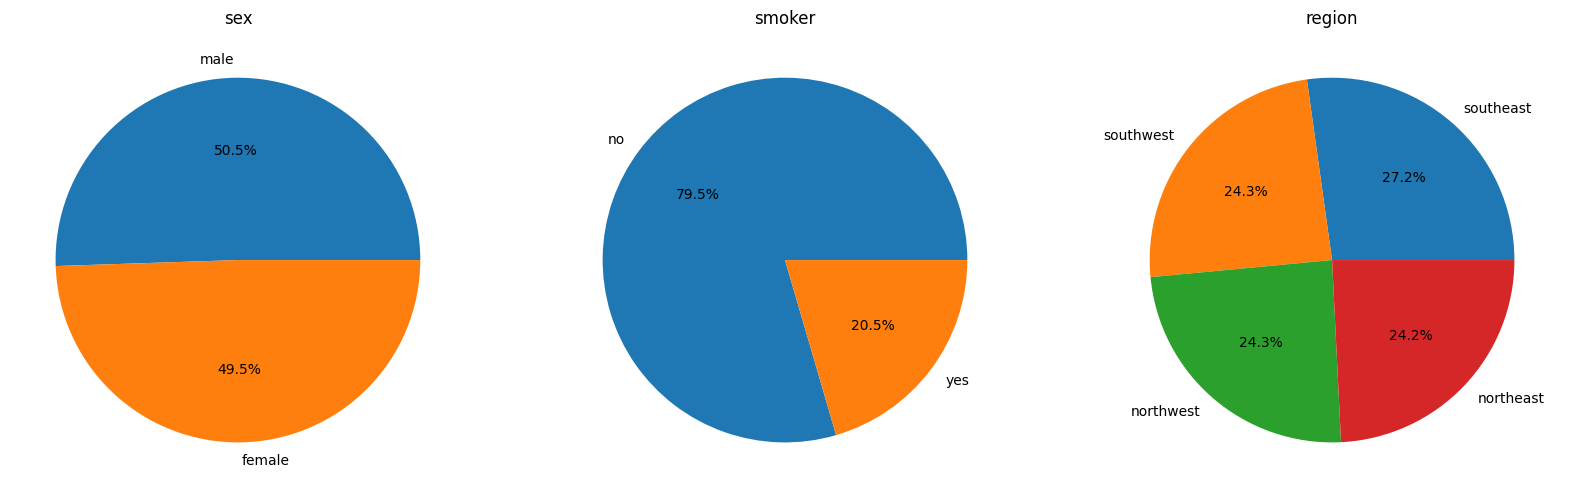

In [6]:
features = ['sex', 'smoker', 'region']

# Create a figure and axes outside the loop
fig, axes = plt.subplots(1, len(features), figsize=(20, 10))

for i, col in enumerate(features):
    # Specify the axis for each subplot
    ax = axes[i]

    # Calculate value counts for the current feature
    x = df[col].value_counts()

    # Plot a pie chart on the specified axis
    ax.pie(x.values,
           labels=x.index,
           autopct='%1.1f%%')

    # Set title for the subplot
    ax.set_title(col)

# Show the plot
plt.show()


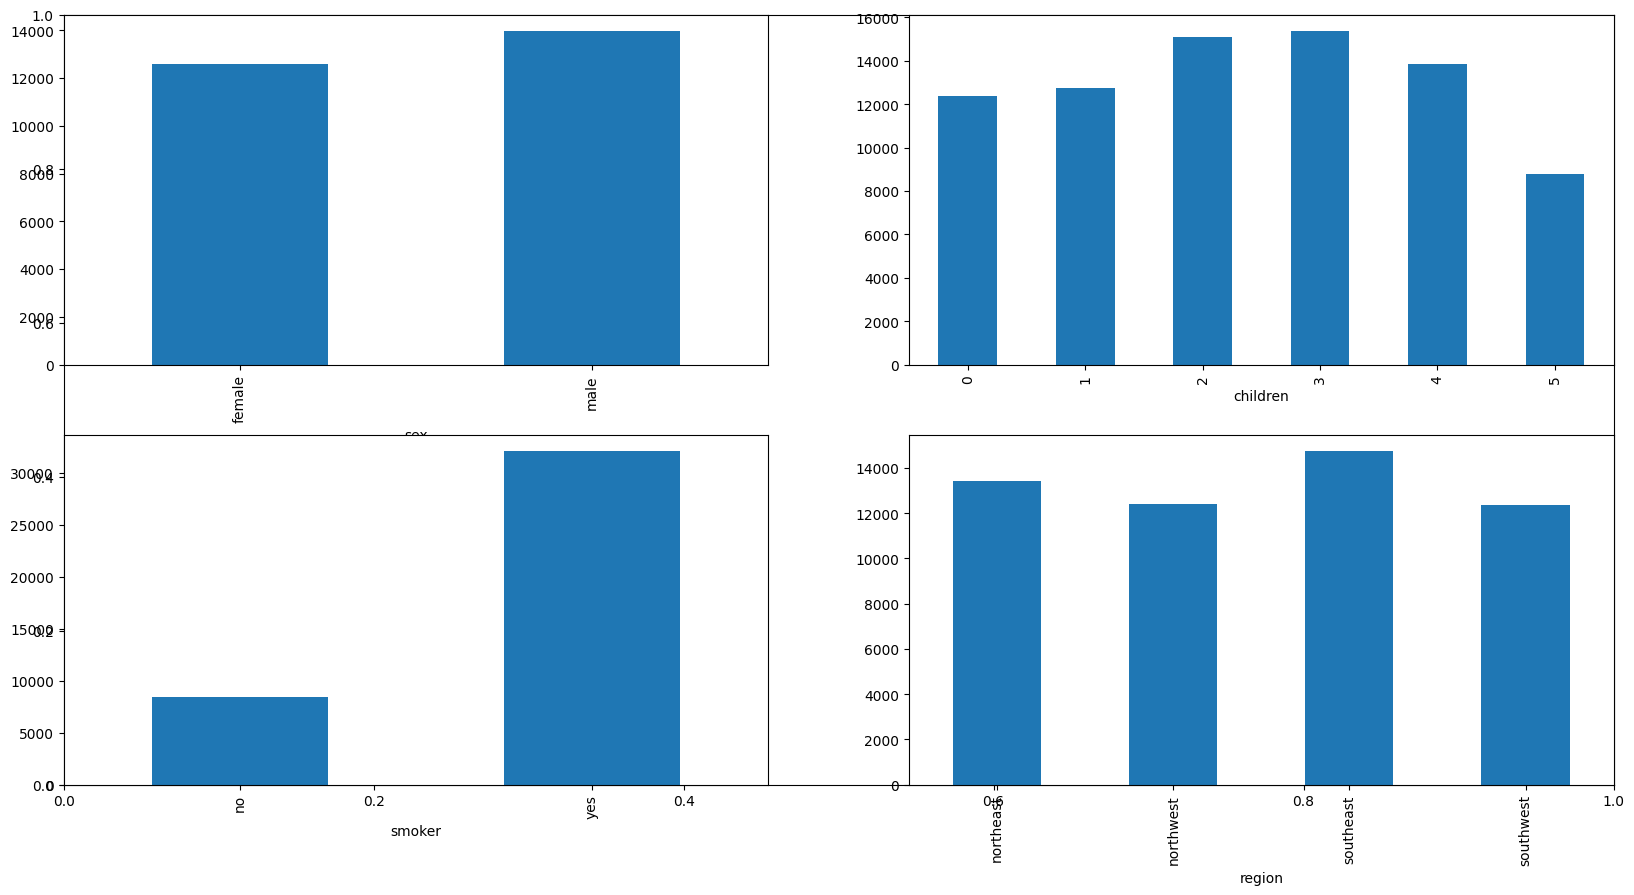

In [7]:
# List of features to plot
features = ['sex', 'children', 'smoker', 'region']

# Create a new figure with a size of 20x10 inches
plt.subplots(figsize=(20, 10))

# Iterate through each feature and create a subplot for it
for i, col in enumerate(features):
    # Create a subplot with 2 rows, 2 columns, and index (i + 1)
    plt.subplot(2, 2, i + 1)

    # Group the DataFrame by the current feature, calculate the mean of 'charges', and plot it as a bar chart
    df.groupby(col).mean()['charges'].plot.bar()

# Display the plot
plt.show()  

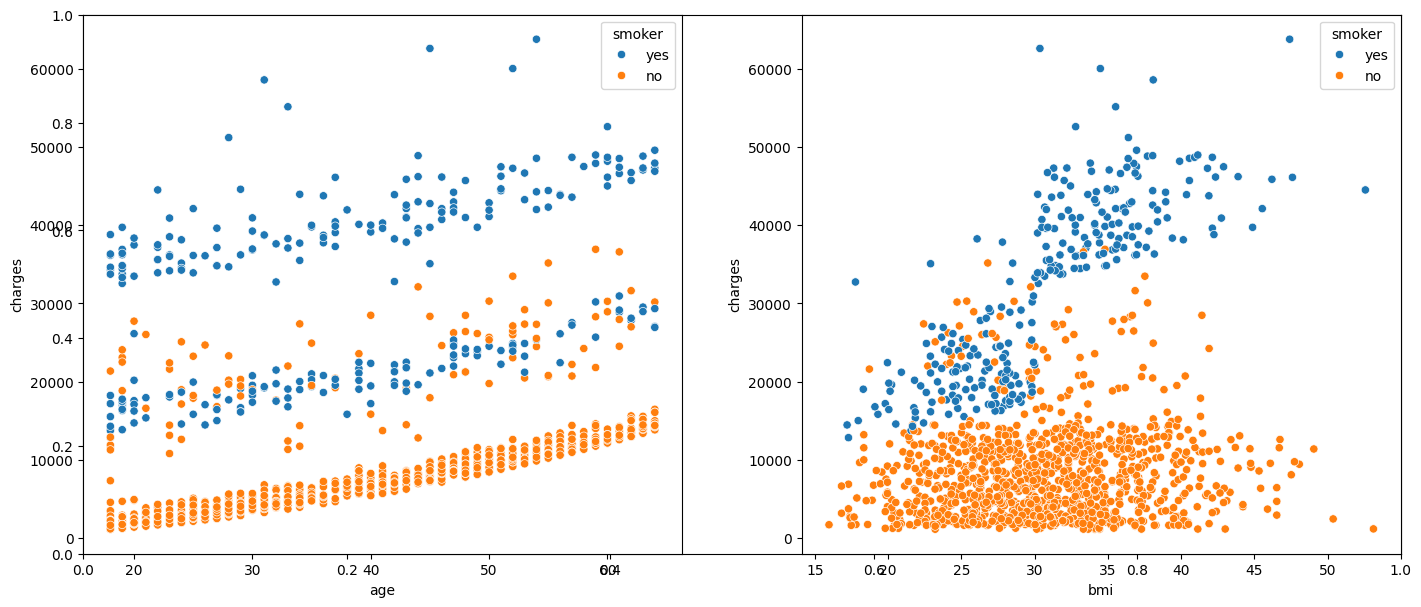

In [8]:
# List of features to plot
features = ['age', 'bmi']

# Create a new figure with a size of 17x7 inches
plt.subplots(figsize=(17, 7))

# Iterate through each feature and create a subplot for it
for i, col in enumerate(features):
    # Create a subplot with 1 row, 2 columns, and index (i + 1)
    plt.subplot(1, 2, i + 1)

    # Plot a scatterplot using Seaborn
    sns.scatterplot(data=df, x=col, y='charges', hue='smoker')

# Display the plot
plt.show()

# Data Preprocessing

<Axes: ylabel='age'>

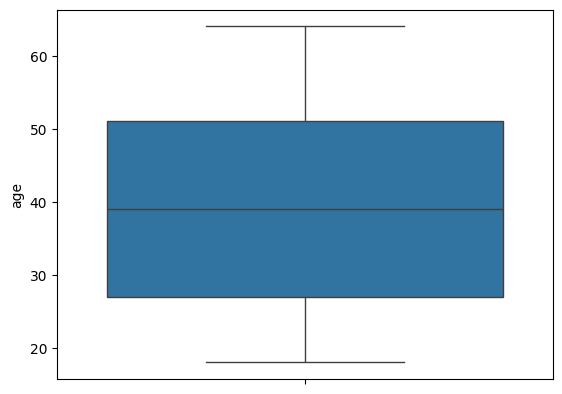

In [9]:
df.drop_duplicates(inplace=True)
sns.boxplot(df['age'])

<Axes: ylabel='bmi'>

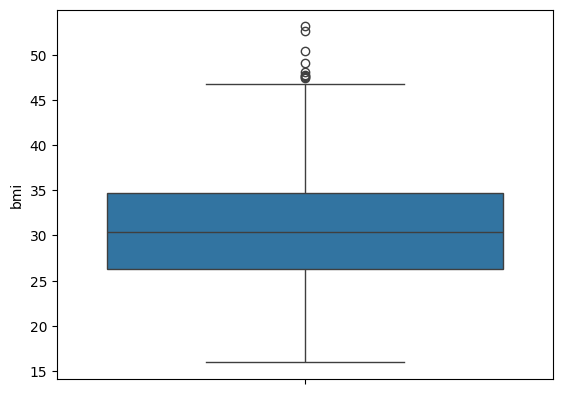

In [10]:
sns.boxplot(df['bmi'])

In [11]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

13.674999999999994
47.31500000000001


# Data Wrangling

In [13]:
df['bmi'].skew()

0.28391419385321137

In [14]:
df['age'].skew()

0.054780773126998195

# Encoding

In [89]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

In [14]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.003243,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.007974,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.156686,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.001907,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.013246,0.787251
region,0.003243,-0.007974,0.156686,-0.001907,0.013246,1.000000,0.011741
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.011741,1.000000


# Model Development

In [15]:
X=df.drop(['charges'],axis=1)
Y=df[['charges']]

l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
 xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
 lrmodel=LinearRegression()
 lrmodel.fit(xtrain,ytrain)
 l1.append(lrmodel.score(xtrain,ytrain))
 l2.append(lrmodel.score(xtest,ytest))
 cvs=(cross_val_score(lrmodel,X,Y,cv=5,)).mean()
 l3.append(cvs)
 df1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
df1

,train acc,test acc,cvs
0,0.754402,0.733555,0.747091
1,0.761210,0.684603,0.747091
2,0.741410,0.782694,0.747091
3,0.763211,0.693610,0.747091
4,0.749515,0.753308,0.747091
5,0.760206,0.702305,0.747091
6,0.745903,0.765655,0.747091
7,0.737870,0.796615,0.747091
8,0.748013,0.754834,0.747091
9,0.745091,0.768705,0.747091


# Linear Regression

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
print(lrmodel.score(xtrain,ytrain))
print(lrmodel.score(xtest,ytest))
print(cross_val_score(lrmodel,X,Y,cv=5,).mean())

0.7414104501076269
0.7826938736089379
0.7470910325728581


# Support Vector Regression 

In [17]:
svrmodel=SVR()
svrmodel.fit(xtrain,ytrain)
ypredtrain1=svrmodel.predict(xtrain)
ypredtest1=svrmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain1))
print(r2_score(ytest,ypredtest1))
print(cross_val_score(svrmodel,X,Y,cv=5,).mean())

-0.09774269027100302
-0.07230814309874001
-0.1036292241111501


# random forest 

In [18]:
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())

estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
rfmodel=RandomForestRegressor(random_state=42,n_estimators=120)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())

0.9741494983591605
0.8628675526370672
0.8371309228391949
{'n_estimators': 98}
0.9742433796570987
0.8634686176821831
0.8367985697519954


# gradient boosting

In [19]:
gbmodel=GradientBoostingRegressor()
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())

estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())

0.8991506267909607
0.8796350281569325
0.8548020388026343
{'learning_rate': 0.21, 'n_estimators': 21}
0.8769928339806577
0.8790122972575037
0.8607242761896201


# eXtreme Gradient Boosting

In [20]:
xgmodel=XGBRegressor()
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())

0.9943146563651976
0.8453874211040754
0.8117188267542492
{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}
0.8778758333653105
0.8854322914968753
0.8617745907199568


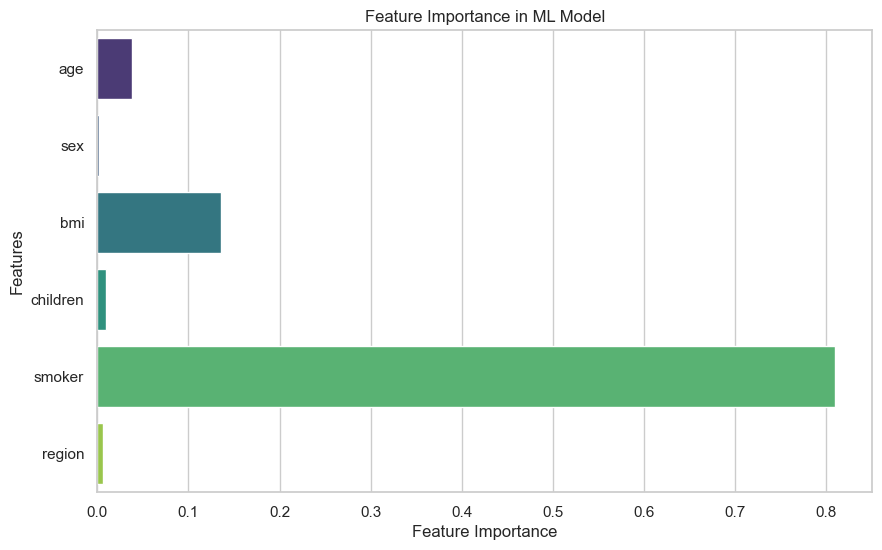

In [91]:
# Assuming feats is your DataFrame with feature importances
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=feats['Importance'], y=feats.index, palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in ML Model')
plt.show()

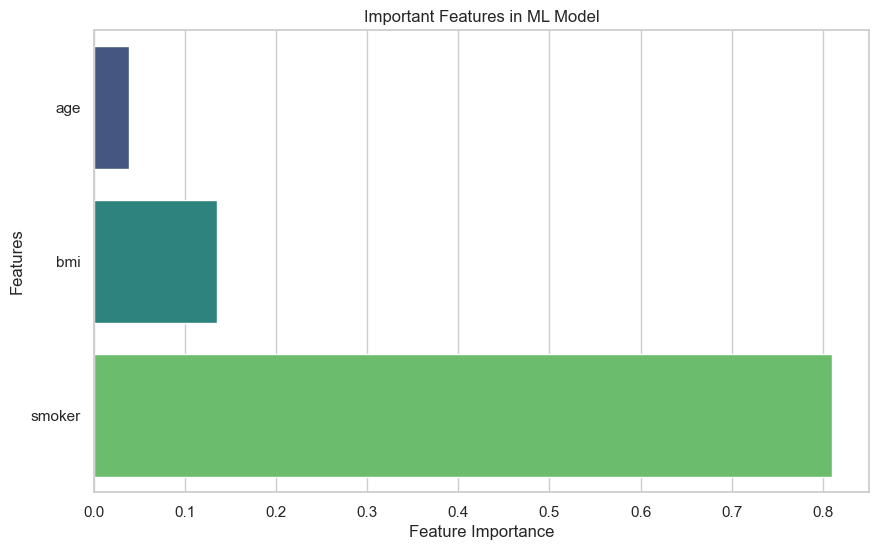

In [94]:
# Assuming important_features is the filtered DataFrame with feature importances > 0.01
important_features = feats[feats['Importance'] > 0.01]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=important_features['Importance'], y=important_features.index, palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Important Features in ML Model')
plt.show()


# Final Model

In [23]:
df.drop(df[['sex','region']],axis=1,inplace=True)
Xf=df.drop(df[['charges']],axis=1)
X=df.drop(df[['charges']],axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(Xf,Y,test_size=0.2,random_state=42)
finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
finalmodel.fit(xtrain,ytrain)
ypredtrain4=finalmodel.predict(xtrain)
ypredtest4=finalmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(finalmodel,X,Y,cv=5,).mean())

0.8766648666630384
0.8846872876472697
0.8618319600029238


# Save Model

In [87]:
dump(finalmodel,open('insurancemodelf.pkl','wb'))

# Predict New Data

In [25]:
new_data=pd.DataFrame({'age':19,'sex':'male','bmi':27.9,'children':0,'smoker':'yes','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['sex','region']],axis=1)
finalmodel.predict(new_data)

array([17876.135], dtype=float32)